In [1]:
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3' 
import tensorflow as tf
from keras import layers
from keras import models
import numpy as np
from keras.utils import to_categorical
from keras.datasets import mnist
import matplotlib.pyplot as plt
import time
start_time = time.time()

Using TensorFlow backend.


In [2]:
#Training Data
pickle_in = open("train_image.pickle", "rb")
train_image = pickle.load(pickle_in)

#Training Labels
pickle_in = open("train_labels.pickle", "rb")
train_labels = pickle.load(pickle_in)

#Testing data
pickle_in = open("test_image.pickle", "rb")
test_image = pickle.load(pickle_in)

#Testing Labels
pickle_in = open("test_labels.pickle", "rb")
test_labels = pickle.load(pickle_in)

In [3]:
print(train_image.shape)
print(train_labels.shape)
print(test_image.shape)
print(test_labels.shape)

(8794, 120, 120)
(8794,)
(977, 120, 120)
(977,)


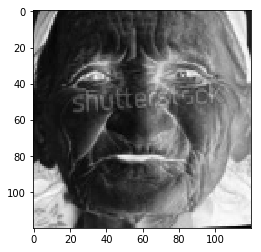

1


In [4]:
plt.imshow(train_image[0], cmap=plt.cm.binary)
plt.show()
print(train_labels[0])

In [5]:
result = np.where(train_labels == 3)

print("Elements with value 15 exists at following indices", result[0], sep='\n')

Elements with value 15 exists at following indices
[7087]


In [6]:
train_labels[7087] = 1

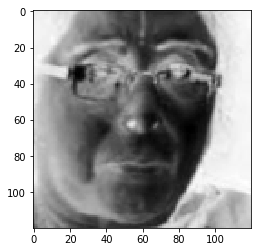

1


In [7]:
plt.imshow(train_image[7087], cmap=plt.cm.binary)
plt.show()
print(train_labels[7087])

In [8]:
train_image = train_image.reshape((8794, 120, 120, 1)) # creating vectors of (120, 120, 1) matrix, 1 is color channel
train_image = train_image.astype('float32')/255

test_image = test_image.reshape((977, 120, 120, 1))# creating vectors of (120, 120, 1) matrix  1 is color channel
test_image = test_image.astype('float32')/255

train_labels = to_categorical(train_labels) # turning into one-hot encoded

test_labels = to_categorical(test_labels)# turning into one-hot encoded 

In [9]:
print(train_labels.shape)
print(test_labels.shape)

(8794, 2)
(977, 2)


In [10]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape= (120, 120, 1)))
model.add(layers.MaxPooling2D((3, 3))) # no params
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((3, 3)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Flatten()) # no params added
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(2, activation='softmax'))

W1013 12:11:38.300475 14872 deprecation_wrapper.py:119] From c:\users\jitender kumar\appdata\local\programs\python\python36\lib\site-packages\keras\backend\tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W1013 12:11:38.476572 14872 deprecation_wrapper.py:119] From c:\users\jitender kumar\appdata\local\programs\python\python36\lib\site-packages\keras\backend\tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W1013 12:11:38.636128 14872 deprecation_wrapper.py:119] From c:\users\jitender kumar\appdata\local\programs\python\python36\lib\site-packages\keras\backend\tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W1013 12:11:38.683000 14872 deprecation_wrapper.py:119] From c:\users\jitender kumar\appdata\local\programs\python\python36\lib\site-packages\keras\backend\tensorflow_backend.py:3976: The 

In [11]:
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

print(model.summary())

model.fit(train_image, train_labels, epochs = 10, batch_size=64)

test_loss, test_acc = model.evaluate(test_image, test_labels)
print(f'Test Accuracy, {test_acc}')
print(f'Test Loss, {test_loss}')

W1013 12:11:38.753778 14872 deprecation_wrapper.py:119] From c:\users\jitender kumar\appdata\local\programs\python\python36\lib\site-packages\keras\optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W1013 12:11:38.778716 14872 deprecation_wrapper.py:119] From c:\users\jitender kumar\appdata\local\programs\python\python36\lib\site-packages\keras\backend\tensorflow_backend.py:3295: The name tf.log is deprecated. Please use tf.math.log instead.



_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 118, 118, 32)      320       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 39, 39, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 37, 37, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 12, 12, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 10, 10, 64)        36928     
_________________________________________________________________
flatten_1 (Flatten)          (None, 6400)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 64)                409664    
__________

W1013 12:11:39.037906 14872 deprecation.py:323] From c:\users\jitender kumar\appdata\local\programs\python\python36\lib\site-packages\tensorflow\python\ops\math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
W1013 12:11:39.179825 14872 deprecation_wrapper.py:119] From c:\users\jitender kumar\appdata\local\programs\python\python36\lib\site-packages\keras\backend\tensorflow_backend.py:986: The name tf.assign_add is deprecated. Please use tf.compat.v1.assign_add instead.



Epoch 1/10
8794/8794 [==============================] - 54s 6ms/step - loss: 0.6212 - acc: 0.6482
Epoch 2/10
8794/8794 [==============================] - 54s 6ms/step - loss: 0.5124 - acc: 0.7396
Epoch 3/10
8794/8794 [==============================] - 54s 6ms/step - loss: 0.4312 - acc: 0.7894
Epoch 4/10
8794/8794 [==============================] - 55s 6ms/step - loss: 0.3806 - acc: 0.8186
Epoch 5/10
8794/8794 [==============================] - 55s 6ms/step - loss: 0.3459 - acc: 0.8338
Epoch 6/10
8794/8794 [==============================] - 55s 6ms/step - loss: 0.3236 - acc: 0.8509
Epoch 7/10
8794/8794 [==============================] - 56s 6ms/step - loss: 0.3034 - acc: 0.8563
Epoch 8/10
8794/8794 [==============================] - 56s 6ms/step - loss: 0.2789 - acc: 0.8751
Epoch 9/10
8794/8794 [==============================] - 56s 6ms/step - loss: 0.2626 - acc: 0.8804
Epoch 10/10
977/977 [==============================] - 2s 2ms/step
Test Accuracy, 0.8178096215336935
Test Loss, 0.4302

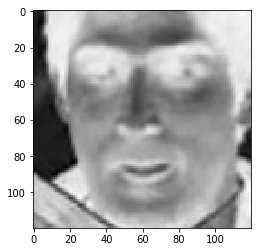

0

In [12]:
index = 301
plt.imshow(test_image[index].reshape(120, 120), cmap=plt.cm.binary)
plt.show()
model.predict([[test_image[index]]]).argmax()

In [13]:
#model.save("model_CNN.h5")
print("--- %s seconds ---" % (time.time() - start_time))

--- 557.5763280391693 seconds ---
